In [9]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("raghadalharbi/breast-cancer-gene-expression-profiles-metabric")

print("Path to dataset files:", path)

100%|██████████████████████████████████████| 2.72M/2.72M [00:00<00:00, 3.94MB/s]

Extracting files...


Path to dataset files: /home/kevin-koshy/.cache/kagglehub/datasets/raghadalharbi/breast-cancer-gene-expression-profiles-metabric/versions/1


In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif


In [15]:
# Load dataset
data = pd.read_csv("METABRIC_RNA_Mutation.csv")  # Replace with your file name
print(data.head())  # View the first few rows


   patient_id  age_at_diagnosis type_of_breast_surgery    cancer_type  \
0           0             75.65             MASTECTOMY  Breast Cancer   
1           2             43.19      BREAST CONSERVING  Breast Cancer   
2           5             48.87             MASTECTOMY  Breast Cancer   
3           6             47.68             MASTECTOMY  Breast Cancer   
4           8             76.97             MASTECTOMY  Breast Cancer   

                        cancer_type_detailed cellularity  chemotherapy  \
0           Breast Invasive Ductal Carcinoma         NaN             0   
1           Breast Invasive Ductal Carcinoma        High             0   
2           Breast Invasive Ductal Carcinoma        High             1   
3  Breast Mixed Ductal and Lobular Carcinoma    Moderate             1   
4  Breast Mixed Ductal and Lobular Carcinoma        High             1   

  pam50_+_claudin-low_subtype  cohort er_status_measured_by_ihc  ... mtap_mut  \
0                 claudin-low     1

/tmp/ipykernel_4417/705624864.py:2: DtypeWarning: Columns (678,688,690,692) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("METABRIC_RNA_Mutation.csv")  # Replace with your file name


In [16]:
data_cleaned = data.dropna()


In [25]:
target_column = 'cancer_type_detailed'  
X = data_cleaned.drop(columns=[target_column])
y = data_cleaned[target_column]


In [26]:
# Handle categorical columns (use One-Hot Encoding)
X_encoded = pd.get_dummies(X, drop_first=True)

# Normalize the data
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X_encoded)

In [30]:
# Encode target column
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

In [31]:
# Feature selection (select top 50 features)
k = 50  # Adjust this value as needed
selector = SelectKBest(score_func=f_classif, k=k)
X_selected = selector.fit_transform(X_normalized, y)

# Get the selected feature names
selected_features = X_encoded.columns[selector.get_support()]
print("\nSelected Features:")
print(selected_features)

# Create a DataFrame for preprocessed data
X_preprocessed = pd.DataFrame(X_selected, columns=selected_features)
print("\nPreprocessed Data:")
print(X_preprocessed.head())


Selected Features:
Index(['cdh1', 'tumor_other_histologic_subtype_Lobular',
       'tumor_other_histologic_subtype_Mixed',
       'tumor_other_histologic_subtype_Mucinous',
       'tumor_other_histologic_subtype_Other', 'oncotree_code_IDC',
       'oncotree_code_ILC', 'oncotree_code_IMMC', 'oncotree_code_MDLC',
       'tp53_mut_E287*', 'muc16_mut_V8260M', 'ahnak2_mut_S4697L',
       'gata3_mut_P432Tfs*75', 'map3k1_mut_I723Yfs*2 H1303del',
       'dnah11_mut_S2963Y', 'cdh1_mut_0', 'dnah2_mut_R1486T',
       'ryr2_mut_G1497R', 'ryr2_mut_H2819Y', 'tbx3_mut_G194Wfs*33',
       'lama2_mut_L1685F', 'ncor2_mut_R2244W', 'col12a1_mut_V2633A',
       'pten_mut_E40*', 'atr_mut_D183H', 'atr_mut_R1631H', 'thada_mut_I413T',
       'thada_mut_P1294S', 'thada_mut_S275N', 'stab2_mut_R2203C T385N',
       'map2k4_mut_W175*', 'lamb3_mut_R988Q', 'ep300_mut_R1821*',
       'rb1_mut_L607V', 'myo1a_mut_S1026G', 'fanca_mut_S1226*',
       'ctcf_mut_E64*', 'foxo3_mut_X208_splice', 'usp28_mut_D969Y',
       'g

/home/kevin-koshy/myenv/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


In [32]:
from sklearn.model_selection import train_test_split

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y_encoded, test_size=0.2, random_state=42)


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00       167
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00        34

    accuracy                           1.00       219
   macro avg       1.00      1.00      1.00       219
weighted avg       1.00      1.00      1.00       219



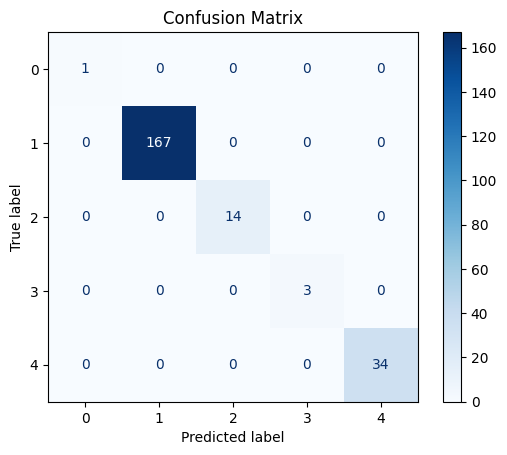

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()
